# 데이터 세트 로딩

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

- 원래 종양이 1, 암이 0
- `target` : 종양을 0, 암을 1

In [3]:
cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

In [4]:
# 데이터 프레임 생성

df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
tumor = df.loc[df['target'] == 1].copy()
cancer = df.loc[df['target'] == 0].copy()

tumor['target'] = 0
cancer['target'] = 1

In [6]:
sample = pd.concat([tumor, cancer[:30]], sort=True)
sample.head()

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96


In [7]:
sample['target'].value_counts()

target
0    357
1     30
Name: count, dtype: int64

# 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  sample.drop('target', axis=1),
  sample['target'],
  random_state=42
)

# 모델 정의 및 학습

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# 정확도 (Accuracy) 확인

## 모델 정확도 확인

In [10]:
from sklearn.metrics import accuracy_score

lr_pred = model.predict(X_test)
accuracy_score(lr_pred, y_test)

0.9690721649484536

## 잘못된 예측의 정확도 확인
- 돌팔이 의사가 암인 사람도 어차피 없는데 그냥 다 종양이라고 해버림

In [11]:
dolpal_pred = np.zeros_like(y_test)
dolpal_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# 돌팔이의 예측 점수
accuracy_score(dolpal_pred, y_test)

0.9072164948453608

정확도만 보고 분류기의 성능을 파악하는 것은 매우 위험!

# 오차 행렬 (혼동행렬 - Confusion Matrix)

In [13]:
from sklearn.metrics import confusion_matrix

# Model의 오차행렬 확인
lr_conf_result = confusion_matrix(y_test, lr_pred)
print('모델의 오차 행렬 : \n{}'.format(lr_conf_result))

# 돌팔이의 오차 행렬 확인
dolpal_conf_result = confusion_matrix(y_test, dolpal_pred)
print('돌팔이의 오차 행렬 : \n{}'.format(dolpal_conf_result))

모델의 오차 행렬 : 
[[87  1]
 [ 2  7]]
돌팔이의 오차 행렬 : 
[[88  0]
 [ 9  0]]


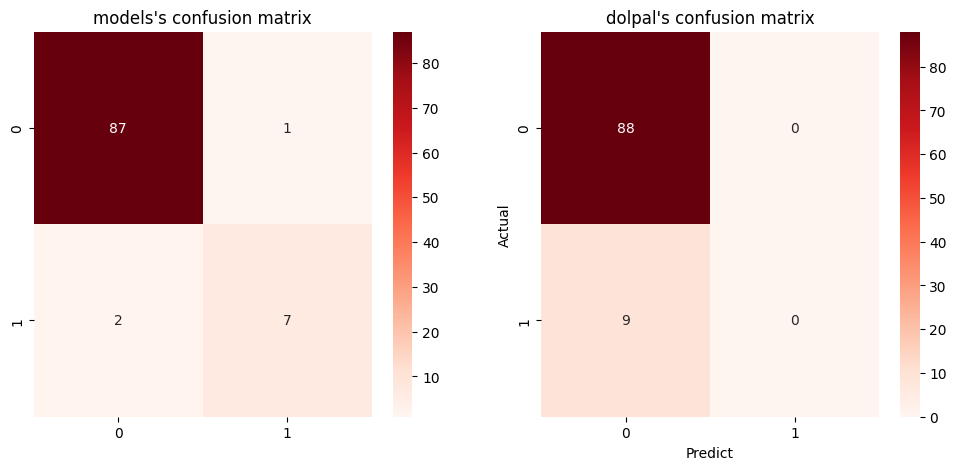

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
lr_conf_result = confusion_matrix(y_test, lr_pred)
ax = sns.heatmap(
  lr_conf_result, 
  annot=True,
  cmap='Reds'
)
ax.set_title("models's confusion matrix")

plt.subplot(122)
dolpal_conf_result = confusion_matrix(y_test, dolpal_pred)
ax = sns.heatmap(
  dolpal_conf_result,
  annot=True,
  cmap='Reds',
)

ax.set_title("dolpal's confusion matrix")

plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

# 정밀도, 재현율 확인

In [15]:
from sklearn.metrics import precision_score, recall_score

# 모델의 정밀도, 재현율
print('모델의 정밀도 : {:.3f}'.format(precision_score(y_test, lr_pred)))
print('모델의 재현율 : {:.3f}'.format(recall_score(y_test, lr_pred)))

# 돌팔이의 정밀도, 재현율
print('돌팔이의 정밀도 : {:.3f}'.format(precision_score(y_test, dolpal_pred)))
print('돌팔이의 재현율 : {:.3f}'.format(recall_score(y_test, dolpal_pred)))


모델의 정밀도 : 0.875
모델의 재현율 : 0.778
돌팔이의 정밀도 : 0.000
돌팔이의 재현율 : 0.000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 정밀도 - 재현율 트레이드 오프
- 양성 예측 확률이 필요함
- 기본은 0.5 넘어가면 양성(1)이 됨
- 모델의 `predict_proba` 메소드를 활용
    - 일반적으로 선형 모델에 있음

In [16]:
pred_proba = model.predict_proba(X_test)
pred = model.predict(X_test)

print(pred_proba[:3])
print()
print(pred[:3])

[[9.99268966e-01 7.31033862e-04]
 [9.99309407e-01 6.90593255e-04]
 [9.99999986e-01 1.38262830e-08]]

[0 0 0]


## Binarizer 클래스
- 지정한 threshold 보다 작으면 0, 크면 1로 분류해주는 클래스

In [17]:
from sklearn.preprocessing import Binarizer

X = [[0.1, 0.7],
     [1.1, 0.0],
     [0.0, 1.2]]

# 예를 들어 0.8 보다 크면 1 / 0.8 보다 작으면 0으로 변환
binarizer = Binarizer(threshold=0.8)
binarizer.fit_transform(X)

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [18]:
custom_threshold = 0.5

pred_proba_1 = model.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)  # 1번 클래스에 대한 예측 확률만

pred_proba_1[:5]

array([[7.31033862e-04],
       [6.90593255e-04],
       [1.38262830e-08],
       [2.86566255e-05],
       [1.37703960e-09]])

In [19]:
binarizer = Binarizer(threshold = custom_threshold)

custom_predict = binarizer.fit_transform(pred_proba_1)
custom_predict[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap='Reds',
    ax=ax
  )
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy, precision, recall))

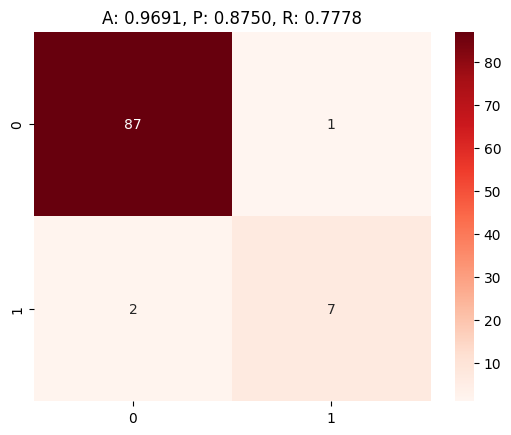

In [21]:
get_clf_eval(y_test, custom_predict)

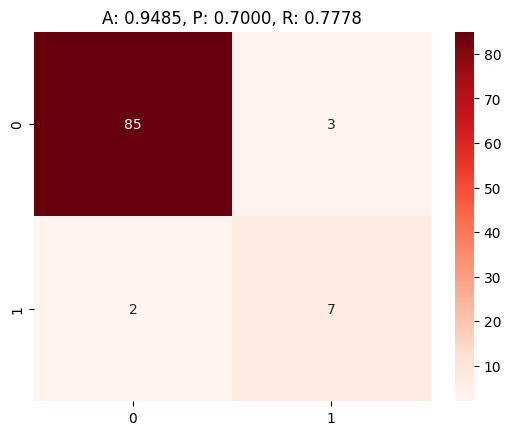

In [22]:
# threshold가 0.1일 때
from sklearn.preprocessing import Binarizer

custom_threshold = 0.1

# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

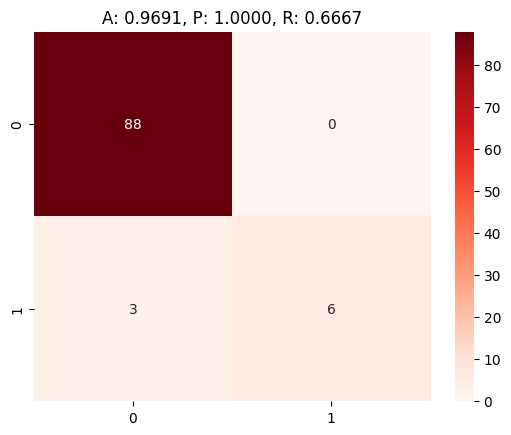

In [23]:
# threshold가 0.8일 때
from sklearn.preprocessing import Binarizer

custom_threshold = 0.8

# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


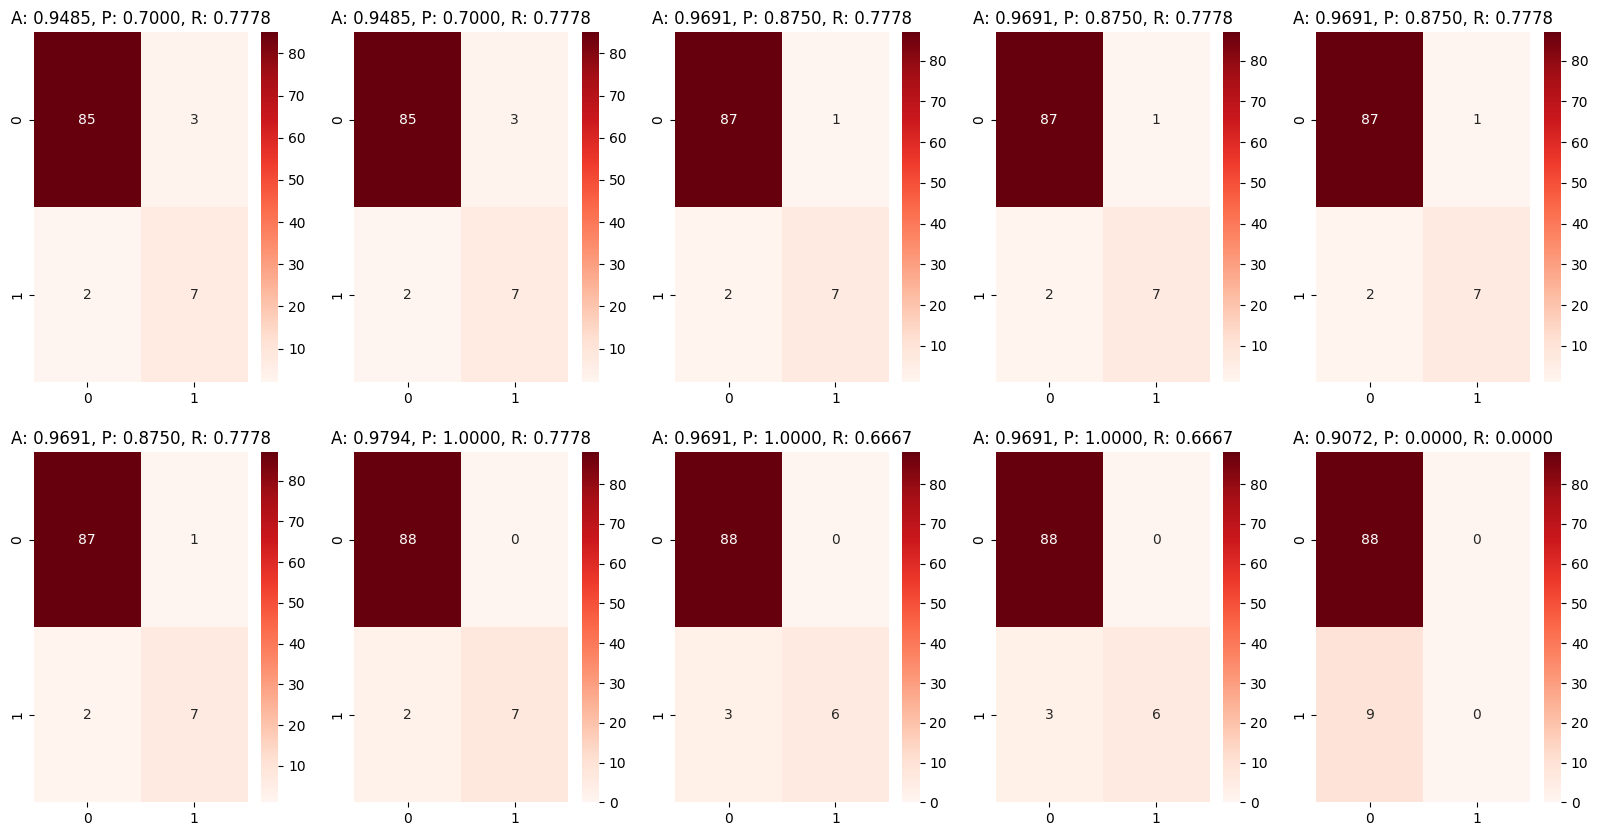

In [24]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
  fig, axes = plt.subplots(nrows=2, ncols=5)
  fig.set_figwidth(20)
  fig.set_figheight(10)
  # threshold list 객체 내 값을 차례로 iteration 하면서 evaluation 수행
  for custom_threshold, ax in zip(thresholds, axes.ravel()):
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

    custom_predict = binarizer.transform(pred_proba)
    get_clf_eval(y_test, custom_predict, ax)
  
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

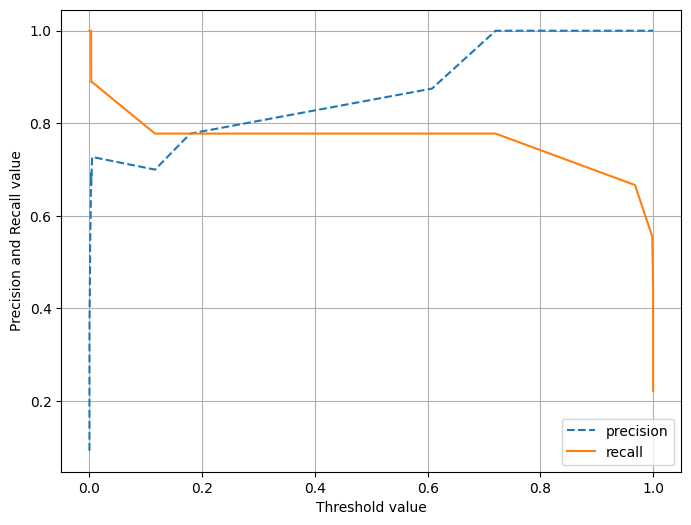

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # x축 threshold 값 / y축은 정밀도,재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:, 1])

# F1 Score

In [26]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
f1

0.823529411764706

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


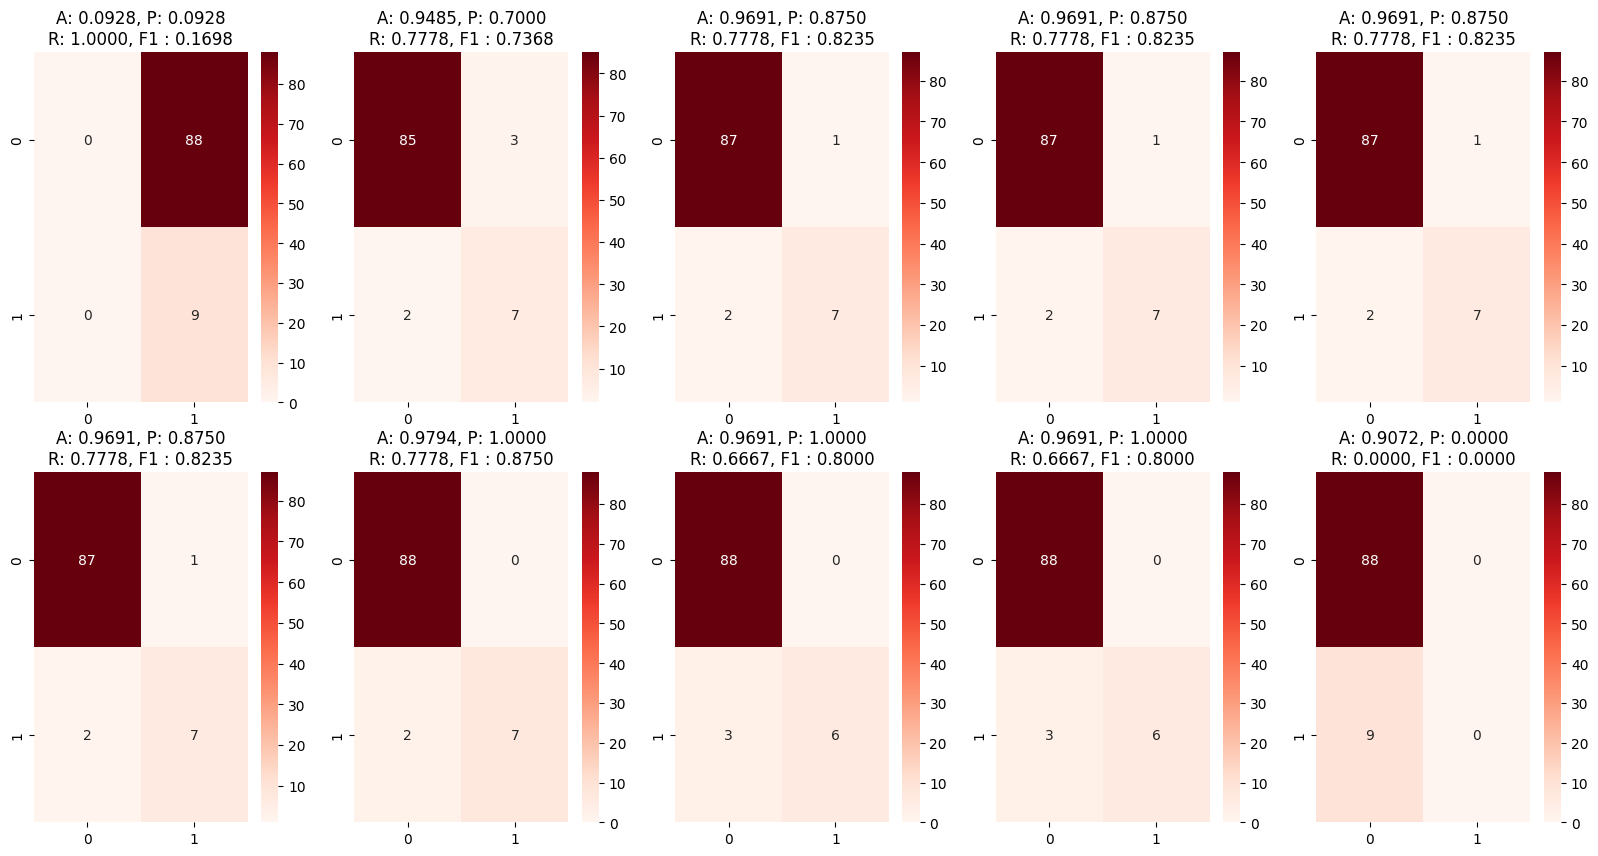

In [27]:
def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )

  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}\nR: {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

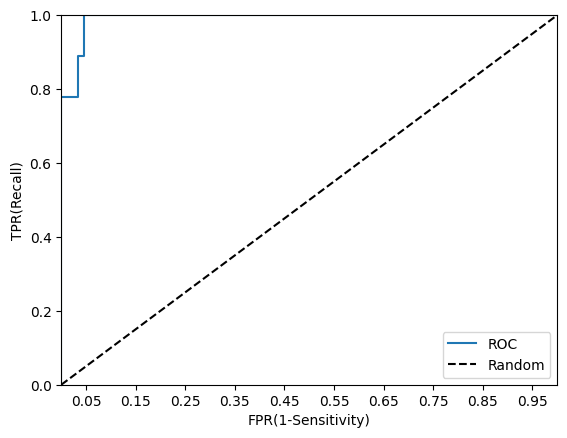

In [28]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

  # ROC Curve를 plot 곡선으로
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선
  plt.plot([0, 1], [0, 1], 'k--', label='Random')

  # FPR X축의 Scale을 0.1단위로 변경. X,Y 축명 설정
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, model.predict_proba(X_test)[:, 1])

In [29]:
from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9912
